### <center>machine learning homework3</center>
<center>dataset: parkisons dataset</center>
<center>ElsticNet,knn, kmeans</center>

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import io
import requests

In [3]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
urldata = requests.get(url).content

# <h>I used pandas data frame data structure to load the data<h>

In [4]:
parkisons = pd.read_csv(io.StringIO(urldata.decode('utf-8')))
print(parkisons.shape)
parkisons.head()

(5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
#to check missing values
parkisons.apply(lambda x: sum(x.isnull().values), axis = 0)

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [6]:
#removing subject, sex, motor_UPDRS and I removed total_UPDRS to assign it to target outcome from the columns in the dataset
col_list = [col for col in parkisons.columns if col not in ['subject#', 'sex', 'motor_UPDRS', 'total_UPDRS']]
parkisons_data = parkisons[col_list]
#dependent or predictor variable
parkisons_target = parkisons['total_UPDRS']

In [7]:
parkisons_data.columns

Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

In [8]:
type(parkisons_target)

pandas.core.series.Series

In [9]:
#training set/testing/validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## <h>Q1.a)Remove 20% of the dataset and keep it for testing. This 20% of the datasetshould never be used for training or validation. You may assume that all 5875 examples are independent, which allows you to do this randomly.</h>

In [10]:
#splitting train and test in 80:20
train_X,  test_X, train_Y, test_Y = train_test_split(parkisons_data, parkisons_target, test_size = 0.2)
print(train_X.columns)
print(train_X.shape)

Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')
(4700, 18)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

## Q1.b to 1.e

In [12]:
Train_X, val_X, Train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.25)
l1_ratios = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] #lambda values11
n_alphas= [0.001,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0] #penalty alpha10
#data frame to store the 110 combinations' mean square error values for each iteration i.e(100*110)
mse_pd = pd.DataFrame(columns=np.arange(110))

In [13]:
#mse, 100 iterations
col_names = []
temp_flag = True
for i in range(100):
    #list to store the mean error in each iteration for each combination
    mse_list = []
    #splitting data into train validation sets
    Train_X, val_X, Train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.25)
    for l1_ratio in l1_ratios:
        flag = True
        for alpha in n_alphas:
            if temp_flag:
                col_names.append(''.join([str(l1_ratio), '-', str(alpha)]))            
                
            ela_fit = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(Train_X, Train_Y)
            mse = mean_squared_error(ela_fit.predict(val_X), val_Y)
            mse_list.append(mse)
    mse_pd = mse_pd.append(pd.Series(mse_list), ignore_index= True)
    temp_flag = False
#change the column names of pandas data frame to 110 combinations values of strings
mse_pd.columns = col_names

/home/santhoshm/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## <h>Q1.f. Create a plot of mean validation error as a function of both α and λ.This should be a 2-D plot. I suggest creating a colour map or contour map(as inmatplotlib.pyplot.pcolorormatplotlib.axes.Axes.contourf)</h>

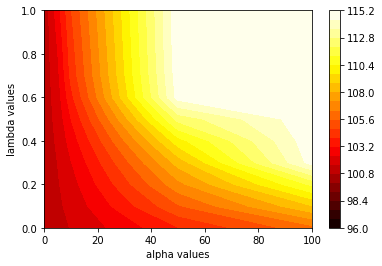

In [14]:
#color plot for mse values for each combination of alpha and lambda values
z = np.asanyarray(mse_pd.mean(axis=0))
y= np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #lambda values
x = np.array([0.001,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0]) #penalty alpha
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, z.reshape(11,10), 25, cmap = 'hot')
plt.xlabel("alpha values")
plt.ylabel("lambda values")
plt.colorbar()
plt.show()

## <h>Q1.g.For the best α-λ combination (that with the lowest mse), train a new modelon both the training and validation data (the 80% of the total datasetthat you didn’t split off in part a)</h>

In [15]:
#the best combination alpha and lambda value is given by the minimum of mean squared error
best_values = col_names[np.argmin(z)].split('-')
print("the best α and λ combination values are α = {} λ = {}".format(best_values[1], best_values[0]))

the best α and λ combination values are α = 0.001 λ = 1.0


In [16]:
#based on mean square error value, the combination of alpha = 0.001, and lambda = 1(LAsso penalty)
#the elastic model for the combination alpha, lambda is as follows
#training set : 80% of the model, test set 20%
elastic_final = ElasticNet(alpha=0.001, l1_ratio=1).fit(train_X, train_Y)
test_mse = mean_squared_error(elastic_final.predict(test_X), test_Y)
print("mean squared error for test set is {}".format(test_mse))
print("mean squared error for validation set is {}".format(z[np.argmin(z)]))

mean squared error for test set is 92.49063535561719
mean squared error for validation set is 96.63774209626288


## <h> Q2.knearest neighbours (kNN). For this problem,use only 5 predictor variables:Age,Jitter(%),Shimmer,NHR, andHNR.</h>

In [17]:
#knn regressor
knn_col=  ['age','Shimmer','Jitter(%)','NHR', 'HNR']
parkisons_knn_data = parkisons[knn_col]

## Q2.a to Q2.e

In [18]:
#train test val split
knn_x, test_knn_x, knn_y, test_knn_y = train_test_split(parkisons_knn_data, parkisons_target, test_size = 0.2)
k = [1,2,3,4,5,6,7,8,9,10,20,50]
knn_mse_pd = pd.DataFrame(columns=np.arange(12))

In [19]:
for l in range(100):
    mse_lst = []
    train_knn_x, val_knn_x,train_knn_y, val_knn_y = train_test_split(knn_x, knn_y, test_size = 0.25)
    for i in k:
        #print(i)
        knn_model = KNeighborsRegressor(n_neighbors=i)
        knn_fit = knn_model.fit(train_knn_x, train_knn_y)
        mse_lst.append(mean_squared_error(knn_fit.predict(val_knn_x), val_knn_y))
    #print(mse_lst)
    knn_mse_pd = knn_mse_pd.append(pd.Series(mse_lst), ignore_index=True)

In [20]:
#get the means of 100 iteration for each k value
knn_means = np.asarray(knn_mse_pd.mean(axis=0))

## Q2.f.Create a plot of mean validation error as a function of k.

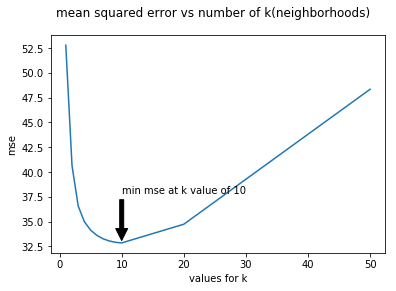

In [29]:
mse_min = knn_means[np.argmin(knn_means)]
xpos = np.argmin(knn_means)
kmin = k[xpos]
plt.plot(k, knn_means)
plt.xlabel("values for k")
plt.ylabel("mse")
plt.suptitle("mean squared error vs number of k(neighborhoods)")
plt.annotate('min mse at k value of {}'.format(kmin), xy=(kmin, mse_min), xytext=(kmin, mse_min+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

In [22]:
print("from the plot best values of k is {}".format(k[np.argmin(knn_means)]))

from the plot best values of k is 10


## Q2.g & h

In [23]:
knn_final_model = KNeighborsRegressor(n_neighbors= 10)
knn_final_model.fit(knn_x, knn_y)
test_mse = mean_squared_error(knn_final_model.predict(test_knn_x), test_knn_y)
val_mse = np.min(knn_means) # validation error
print("validation error is {} and test error is {}".format(val_mse,test_mse))

validation error is 32.85515702558008 and test error is 33.47403117606042


## Q4. KMeans clustering algorithm

In [24]:
#k means algorithm
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.neighbors import DistanceMetric

In [25]:
parkisons_kmeans = parkisons_knn_data
#since it is a clustering and unsupervised learning am adding target variable total_UPDRS column data
parkisons_kmeans = parkisons_kmeans.assign( total_UPDRS = np.asarray(parkisons['total_UPDRS']))
parkisons_kmeans.describe()

,age,Shimmer,Jitter(%),NHR,HNR,total_UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.034035,0.006154,0.032120,21.679495,29.018942
std,8.821524,0.025835,0.005624,0.059692,4.291096,10.700283
min,36.000000,0.003060,0.000830,0.000286,1.659000,7.000000
25%,58.000000,0.019120,0.003580,0.010955,19.406000,21.371000
50%,65.000000,0.027510,0.004900,0.018448,21.920000,27.576000
75%,72.000000,0.039750,0.006800,0.031463,24.444000,36.399000
max,85.000000,0.268630,0.099990,0.748260,37.875000,54.992000


In [26]:
#split dataset into train vs test splits with 80:20
kmeans_train_x, kmeans_test_x = train_test_split(parkisons_kmeans, test_size = 0.2)
#split dataset into train vs validation splits with 75:25
kmeans_x_train, kmeans_val_x = train_test_split(kmeans_train_x, test_size = 0.25)
kmeans_x_train.describe()

,age,Shimmer,Jitter(%),NHR,HNR,total_UPDRS
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,64.811915,0.033510,0.006149,0.031517,21.724946,28.883071
std,8.785731,0.025074,0.005691,0.057982,4.248200,10.644444
min,36.000000,0.004060,0.000830,0.000304,1.659000,7.000000
25%,58.000000,0.019000,0.003570,0.010916,19.417000,21.259000
50%,65.000000,0.027130,0.004880,0.018555,21.970000,27.486000
75%,72.000000,0.039440,0.006750,0.031233,24.494000,36.022000
max,85.000000,0.268630,0.099990,0.748260,37.187000,54.992000


In [27]:
k_means = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 50]
#euclidian distnace metric
dist = DistanceMetric.get_metric('euclidean')
#creating data frame with number of elements in k_means arrary
kmeans_mse_pd = pd.DataFrame(columns=range(17))

In [28]:
#comparison of different numbered clusters based on measuring the scatter of the data points
#relative to their cluster centres
for iteration in range(100):
    mse_list = []
    kmeans_x_train, kmeans_val_x = train_test_split(kmeans_train_x, test_size = 0.25)
    for i in k_means:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(kmeans_x_train)
        labels = kmeans.predict(kmeans_val_x)
        centroids = kmeans.cluster_centers_
        count = 0
        for index, value in enumerate(labels):
            count += distance.euclidean(np.asarray(kmeans_val_x.iloc[index]), centroids[value - 1])
        mse_list.append(count/len(labels))
    kmeans_mse_pd = kmeans_mse_pd.append(pd.Series(mse_list), ignore_index=True)

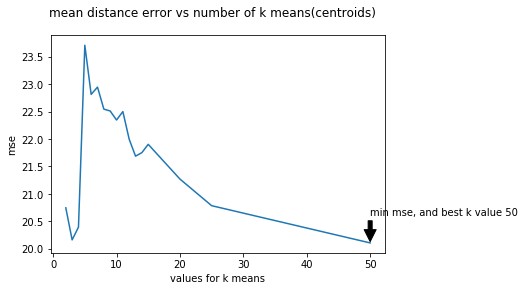

In [30]:
kmeans_values = np.asarray(kmeans_mse_pd.mean(axis=0))
plt.plot(k_means, kmeans_mse_pd.mean(axis=0))
mse_min = np.min(kmeans_values)
x_index = np.argmin(kmeans_values)
xmin = k_means[x_index]
plt.xlabel("values for k means")
plt.ylabel("mse")
plt.suptitle("mean distance error vs number of k means(centroids)")
plt.annotate('min mse, and best k value {}'.format(xmin), xy=(xmin, mse_min), xytext=(xmin, mse_min+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )
plt.show()

In [31]:
best_kvalue = xmin
kmeans_final = KMeans(n_clusters= best_kvalue)
kmeans_final.fit(kmeans_train_x)
labels_final = kmeans_final.predict(kmeans_test_x)
#collect the centroid of the cluster
centroids_final = kmeans_final.cluster_centers_

In [32]:
#calculate the distance from actual data point to the corresponding cluster's centroid for test set
count = 0
for index, value in enumerate(labels_final):
    count += distance.euclidean(np.asanyarray(kmeans_test_x.iloc[index]), centroids_final[value - 1])
test_error = mse_distance = count/len(kmeans_test_x)
val_error = np.min(kmeans_values)
print("mean error euclidiance distance for validation set is {} and for test set is {}".format(val_error, test_error))

mean error euclidiance distance for validation set is 20.10550894199359 and for test set is 21.26907856994646


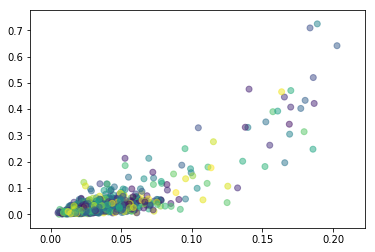

In [33]:
#labels distribution among shimmer and NHR columnar data
plt.scatter(kmeans_test_x['Shimmer'], kmeans_test_x['NHR'], c=labels, alpha=0.5)
plt.show()

## <center> end of the homwork </center>
## trying above problems with sklearn's GridsearchCV

In [47]:
# elastic net model using gridsearch CV of sklearn for comparison with above model
from sklearn.linear_model import Ridge, ElasticNet, Lasso, ElasticNetCV, RidgeCV
from sklearn.model_selection import GridSearchCV

#forming paramter grid with l1 ration and alpha values
parameters_grid = {"l1_ratio": [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],"alpha":[0.001,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0]}
elastic_model = ElasticNet()
grid = GridSearchCV(elastic_model, param_grid= parameters_grid, cv= 5)
grid.fit(train_X, train_Y)

/home/santhoshm/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/santhoshm/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/santhoshm/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/santhoshm/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0], 'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
print(grid.best_params_)
mean_squared_error(grid.predict(test_X), test_Y)

{'l1_ratio': 1.0, 'alpha': 0.001}


96.139479680647781

In [62]:
#kmeans algorithms with scikit learning to check the best parameters with gridsearch CV
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

kmeans_param_grid = {"n_clusters": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 50]}
kmeans_sklearn = KMeans()
grid_kmeans = GridSearchCV(kmeans_sklearn, kmeans_param_grid, cv = 10 )

In [63]:
grid_kmeans.fit(kmeans_train_x)

GridSearchCV(cv=10, error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
#its matched with my best estimation
print(grid_kmeans.best_estimator_.inertia_)
print("the best total number of clusters to be in this model is {}".format(grid_kmeans.best_params_))

33645.242841
the best total number of clusters to be in this model is {'n_clusters': 50}


In [125]:
#kNN regressor
#choosing best value of k value given array of k values
knn_sklearn = KNeighborsRegressor()

In [145]:
knn_param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,50]}
grid_knn = GridSearchCV(knn_sklearn, knn_param_grid,cv = 10).fit(knn_x, knn_y)

In [146]:
grid_knn.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [147]:
mean_squared_error(grid_knn.predict(test_knn_x), test_knn_y)
#when i compare with this gridsearch i almost got the same mean squared error but with 9 as best number of neighbors.

35.69908812644654